## Description:  
This script performs what is described in Fig 5, i.e., analyzing dN/dS scores and disorder percent values of proteins, divided into condensate and non-condensate forming proteins.
A proteins was defined as "condensate forming" if its PICNIC score was >= 0.5 .
In the last section, this script utalizes a linear model to analyze the relationship between protein's condenstae-formation, disorder content and evolutionary rate. 

In [65]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import mannwhitneyu

In [66]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [73]:
hsv_uniprot_path = # path for hsv1_protein_level_table.csv #
hcmv_uniprot_path = # path for hcmv_protein_level.csv #
kshv_uniprot_path = # path for kshv_protein_level.csv #

## filter tables

In [75]:
# Create dataframe

hsv_df = pd.read_csv(hsv_uniprot_path)
hcmv_df = pd.read_csv(hcmv_uniprot_path)
kshv_df = pd.read_csv(kshv_uniprot_path)

In [76]:
# Take only relevant columns

hsv_df = hsv_df[['Uniprot ID' , 'picnic score', 'condensate' , 'unmasked_plddt_disorder_percent' , 'dN/dS']]
hcmv_df = hcmv_df[['Uniprot ID' , 'picnic score', 'condensate' , 'unmasked_plddt_disorder_percent', 'dN/dS']]
kshv_df = kshv_df[['Uniprot ID' , 'picnic score', 'condensate' , 'unmasked_plddt_disorder_percent' , 'dN/dS']]

In [78]:
# Take only rows of protein with dN/dS value and disorder percent value

hsv_unmasked_df_dnds = hsv_df[(~hsv_df['dN/dS'].isna()) & (~hsv_df['unmasked_plddt_disorder_percent'].isna())].copy()
hcmv_unmasked_df_dnds = hcmv_df[(~hcmv_df['dN/dS'].isna()) & (~hcmv_df['unmasked_plddt_disorder_percent'].isna())].copy()
kshv_unmasked_df_dnds = kshv_df[(~kshv_df['dN/dS'].isna()) & (~kshv_df['unmasked_plddt_disorder_percent'].isna())].copy()

## plot - disorder percent in condensate- / non-condensate - forming proteins

### HSV

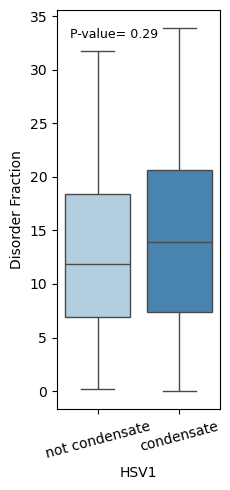

In [85]:
plt.figure(figsize=(2.4, 5))

plot = sns.boxplot(x='condensate', y='unmasked_plddt_disorder_percent', data= hsv_unmasked_df_dnds , hue = 'condensate', palette = 'Blues_r', legend = False, order = ['not condensate', 'condensate'], showfliers = False)
plt.xticks(rotation=15)


# labels
plot.set(xlabel='HSV1',ylabel='Disorder Fraction')

# Calculate P-value
group_a = hsv_unmasked_df_dnds[hsv_unmasked_df_dnds['condensate'] == 'condensate'].dropna()['unmasked_plddt_disorder_percent']
group_b = hsv_unmasked_df_dnds[hsv_unmasked_df_dnds['condensate'] == 'not condensate'].dropna()['unmasked_plddt_disorder_percent']
stat, p_value = mannwhitneyu(group_a, group_b, alternative='greater')
p_round = round(p_value,3)

# Annotate the plot with the P-value
text = f"P-value= {p_round}"
plt.text( 0.2,33, text, ha='center', fontsize=9)


plt.tight_layout()
plt.show()

### HCMV

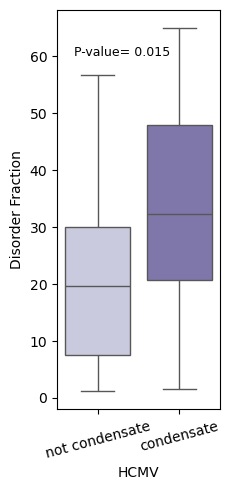

In [87]:
plt.figure(figsize=(2.4, 5))

plot = sns.boxplot(x='condensate', y='unmasked_plddt_disorder_percent', data= hcmv_unmasked_df_dnds, hue='condensate' , palette = 'Purples', legend = False, order = ['not condensate', 'condensate'], showfliers = False)
plt.xticks(rotation=15)

# Labels
plot.set(xlabel='HCMV',ylabel='Disorder Fraction')

# Calculate P-value
group_a = hcmv_unmasked_df_dnds[hcmv_unmasked_df_dnds['condensate'] == 'condensate'].dropna()['unmasked_plddt_disorder_percent']
group_b = hcmv_unmasked_df_dnds[hcmv_unmasked_df_dnds['condensate'] == 'not condensate'].dropna()['unmasked_plddt_disorder_percent']
stat, p_value = mannwhitneyu(group_a, group_b, alternative='greater')
p_round = round(p_value,3)

# Annotate the plot with the P-value
text = f"P-value= {p_round}"
plt.text( 0.3,60, text, ha='center', fontsize=9)

plt.tight_layout()
plt.show()

### KSHV

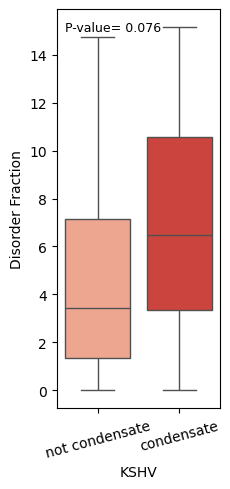

In [88]:
plt.figure(figsize=(2.4, 5))

plot = sns.boxplot(x='condensate', y='unmasked_plddt_disorder_percent', data= kshv_unmasked_df_dnds, hue = 'condensate' , palette = 'Reds', legend = False , showfliers = False , order = ['not condensate', 'condensate'])
plt.xticks(rotation=15)

# Labels
plot.set(xlabel='KSHV',ylabel='Disorder Fraction')

# Calculate P-value
group_a = kshv_unmasked_df_dnds[kshv_unmasked_df_dnds['condensate'] == 'condensate'].dropna()['unmasked_plddt_disorder_percent']
group_b = kshv_unmasked_df_dnds[kshv_unmasked_df_dnds['condensate'] == 'not condensate'].dropna()['unmasked_plddt_disorder_percent']
stat, p_value = mannwhitneyu(group_a, group_b, alternative='greater')
p_round = round(p_value,3)

# Annotate the plot with the P-value
text = f"P-value= {p_round}"
plt.text( 0.19,15, text, ha='center', fontsize=9)

plt.tight_layout()
plt.show()

## plot - dN/dS in condensate- / non-condensate - forming proteins

### HSV

In [90]:
# Make sure dN/dS values are float

hsv_unmasked_df_dnds['dN/dS'] = hsv_unmasked_df_dnds['dN/dS'].astype(float)
hcmv_unmasked_df_dnds['dN/dS'] = hcmv_unmasked_df_dnds['dN/dS'].astype(float)
kshv_unmasked_df_dnds['dN/dS'] = kshv_unmasked_df_dnds['dN/dS'].astype(float)

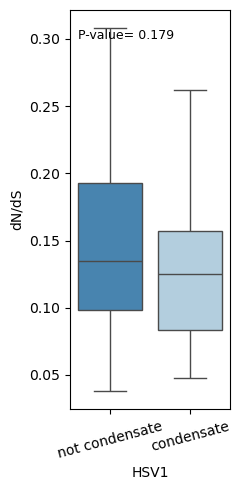

In [91]:
plt.figure(figsize=(2.5, 5))

plot = sns.boxplot(x='condensate', y='dN/dS', data= hsv_unmasked_df_dnds , hue = 'condensate', palette = 'Blues', order = ['not condensate', 'condensate'], showfliers = False)
plt.xticks(rotation=15)

# Labels
plot.set(xlabel='HSV1',ylabel='dN/dS')

# Calculate P-value
group_a = hsv_unmasked_df_dnds[hsv_unmasked_df_dnds['condensate'] == 'condensate'].dropna()['dN/dS']
group_b = hsv_unmasked_df_dnds[hsv_unmasked_df_dnds['condensate'] == 'not condensate'].dropna()['dN/dS']
stat, p_value = mannwhitneyu(group_a, group_b, alternative='less')
p_round = round(p_value,3)

# Annotate the plot with the P-value
text = f"P-value= {p_round}"
plt.text( 0.2,0.3, text, ha='center', fontsize=9)


plt.tight_layout()
plt.show()

### HCMV

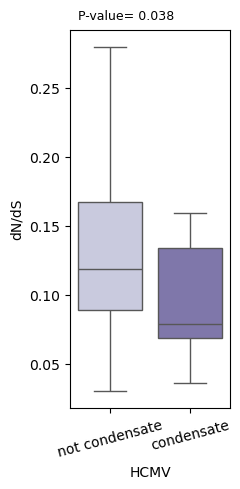

In [92]:
plt.figure(figsize=(2.5, 5))

plot = sns.boxplot(x='condensate', y='dN/dS', data= hcmv_unmasked_df_dnds, hue='condensate' , palette = 'Purples', order = ['not condensate', 'condensate'] ,  showfliers = False)
plt.xticks(rotation=15)

# Labels
plot.set(xlabel='HCMV',ylabel='dN/dS')

# Calculate P-value
group_a = hcmv_unmasked_df_dnds[hcmv_unmasked_df_dnds['condensate'] == 'condensate'].dropna()['dN/dS']
group_b = hcmv_unmasked_df_dnds[hcmv_unmasked_df_dnds['condensate'] == 'not condensate'].dropna()['dN/dS']
stat, p_value = mannwhitneyu(group_a, group_b, alternative='less')
p_round = round(p_value,3)

# Annotate the plot with the P-value
text = f"P-value= {p_round}"
plt.text( 0.2,0.3, text, ha='center', fontsize=9)


plt.tight_layout()
plt.show()

### KSHV

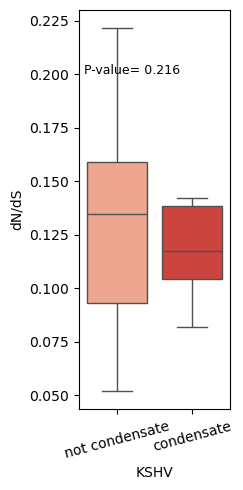

In [93]:
plt.figure(figsize=(2.5, 5))

plot = sns.boxplot(x='condensate', y='dN/dS', data= kshv_unmasked_df_dnds, hue = 'condensate' , palette = 'Reds', order = ['not condensate', 'condensate'],  showfliers = False)
plt.xticks(rotation=15)

# Labels
plot.set(xlabel='KSHV',ylabel='dN/dS')

# Calculate P-value
group_a = kshv_unmasked_df_dnds[kshv_unmasked_df_dnds['condensate'] == 'condensate'].dropna()['dN/dS']
group_b = kshv_unmasked_df_dnds[kshv_unmasked_df_dnds['condensate'] == 'not condensate'].dropna()['dN/dS']
stat, p_value = mannwhitneyu(group_a, group_b, alternative='less')
p_round = round(p_value,3)

# Annotate the plot with the P-value
text = f"P-value= {p_round}"
plt.text( 0.2,0.2, text, ha='center', fontsize=9)



plt.tight_layout()
plt.show()

## Linear model - HSV

In [23]:
# Encode the variables type
hsv_unmasked_df_dnds = hsv_unmasked_df_dnds.rename(columns = {'picnic score':'picnic_score' , 'dN/dS': 'dNdS'})

In [96]:
# Encode the variables type
hsv_unmasked_df_dnds['unmasked_plddt_disorder_percent'] = hsv_unmasked_df_dnds['unmasked_plddt_disorder_percent'].astype('float')
hsv_unmasked_df_dnds['dNdS'] = hsv_unmasked_df_dnds['dNdS'].astype('float')
hsv_unmasked_df_dnds['picnic_score'] = hsv_unmasked_df_dnds['picnic_score'].astype('float')

In [97]:
# Fit a linear model
model_hsv = smf.ols('dNdS ~ picnic_score + unmasked_plddt_disorder_percent', data=hsv_unmasked_df_dnds).fit()

# Summary of the model
print(model_hsv.summary())

                            OLS Regression Results                            
Dep. Variable:                   dNdS   R-squared:                       0.268
Model:                            OLS   Adj. R-squared:                  0.244
Method:                 Least Squares   F-statistic:                     11.19
Date:                Sun, 27 Apr 2025   Prob (F-statistic):           7.26e-05
Time:                        12:18:12   Log-Likelihood:                 84.347
No. Observations:                  64   AIC:                            -162.7
Df Residuals:                      61   BIC:                            -156.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

## Linear model - HCMV

In [100]:
# Encode the variables type
hcmv_unmasked_df_dnds = hcmv_unmasked_df_dnds.rename(columns = {'picnic score':'picnic_score' , 'dN/dS': 'dNdS'})

In [101]:
# Encode the variables type
hcmv_unmasked_df_dnds['unmasked_plddt_disorder_percent'] = hcmv_unmasked_df_dnds['unmasked_plddt_disorder_percent'].astype('float')
hcmv_unmasked_df_dnds['dNdS'] = hcmv_unmasked_df_dnds['dNdS'].astype('float')
hcmv_unmasked_df_dnds['picnic score'] = hcmv_unmasked_df_dnds['picnic_score'].astype('float')

In [102]:
# Fit a linear model
model_hcmv = smf.ols('dNdS ~ picnic_score + unmasked_plddt_disorder_percent', data=hcmv_unmasked_df_dnds).fit()

# Summary of the model
print(model_hcmv.summary())

                            OLS Regression Results                            
Dep. Variable:                   dNdS   R-squared:                       0.114
Model:                            OLS   Adj. R-squared:                  0.097
Method:                 Least Squares   F-statistic:                     6.518
Date:                Sun, 27 Apr 2025   Prob (F-statistic):            0.00218
Time:                        12:18:12   Log-Likelihood:                 140.07
No. Observations:                 104   AIC:                            -274.1
Df Residuals:                     101   BIC:                            -266.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

## Linear model - KSHV

In [105]:
# Encode the variables type
kshv_unmasked_df_dnds = kshv_unmasked_df_dnds.rename(columns = {'picnic score':'picnic_score' , 'dN/dS': 'dNdS'})

In [106]:
# Encode the variables type
kshv_unmasked_df_dnds['unmasked_plddt_disorder_percent'] = kshv_unmasked_df_dnds['unmasked_plddt_disorder_percent'].astype('float')
kshv_unmasked_df_dnds['dNdS'] = kshv_unmasked_df_dnds['dNdS'].astype('float')
kshv_unmasked_df_dnds['picnic_score'] = kshv_unmasked_df_dnds['picnic_score'].astype('float')

In [107]:
# Fit a linear model
model_kshv = smf.ols('dNdS ~ picnic_score + unmasked_plddt_disorder_percent', data=kshv_unmasked_df_dnds).fit()

# Summary of the model
print(model_kshv.summary())

                            OLS Regression Results                            
Dep. Variable:                   dNdS   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.025
Method:                 Least Squares   F-statistic:                    0.2124
Date:                Sun, 27 Apr 2025   Prob (F-statistic):              0.809
Time:                        12:18:12   Log-Likelihood:                 101.45
No. Observations:                  65   AIC:                            -196.9
Df Residuals:                      62   BIC:                            -190.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 